# Data Pre-Processing (Linear Regression Train)

This notebook is to run the data pre-processing as described in the progress report.
https://docs.google.com/presentation/d/1PXPFEvt1X1ZZcwDqsMTOGpfHNX_rQHvGJvN-3QbUprI/edit?ts=605064b2#slide=id.p

In [83]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [84]:
df = pd.read_csv('train.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0


## Removing unuseful features

* Town - because it duplicates with Planning Area
* Block - useful geographical location information is already included in latitude and longitude
* Street_name - same as ‘block’
* Eco_category - remove because all are uncategorised 
* Elevation - remove because all the same
* Subzone - highly overlap with Planning Area

In [85]:
df=df.drop(columns=["town","block","street_name","eco_category","elevation","subzone"])
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,resale_price
0,2001-08,4 room,01 to 03,118.0,model a,1989,1.369008,103.958697,pasir ris,east region,209700.0
1,2014-10,5-room,10 to 12,110.0,improved,2003,1.399007,103.906991,punggol,north-east region,402300.0
2,2020-09,5 room,01 to 03,112.0,premium apartment,2004,1.388348,103.873815,sengkang,north-east region,351000.0
3,2000-10,3 room,07 to 09,67.0,new generation,1980,1.318493,103.766702,clementi,west region,151200.0
4,2013-01,3-room,07 to 09,73.0,model a,1985,1.348149,103.742658,bukit batok,west region,318600.0


## Clean dirty records

In [86]:
arr_month=df["month"].unique()
np.sort(arr_month)

array(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
       '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
       '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
       '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12',
       '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06',
       '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12',
       '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06',
       '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12',
       '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06',
       '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12',
       '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
       '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
       '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', 

In [87]:
values=df["flat_type"].unique()
print("Before, flat_type:")
print(np.sort(values))

Before, flat_type:
['1 room' '1-room' '2 room' '2-room' '3 room' '3-room' '4 room' '4-room'
 '5 room' '5-room' 'executive' 'multi generation']


In [88]:
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="5-room", "5 room")
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="4-room", "4 room")
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="3-room", "3 room")
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="2-room", "2 room")
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="1-room", "1 room")

df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="5 room", 5)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="4 room", 4)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="3 room", 3)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="2 room", 2)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="1 room", 1)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="executive", 6)
df["flat_type"]=df["flat_type"].mask(df["flat_type"]=="multi generation", 7)

In [89]:
values=df["flat_type"].unique()
print("After, flat_type:")
print(np.sort(values))

After, flat_type:
[1 2 3 4 5 6 7]


In [90]:
values=df["storey_range"].unique()
print("Before, storey_range:")
print(np.sort(values))

Before, storey_range:
['01 to 03' '01 to 05' '04 to 06' '06 to 10' '07 to 09' '10 to 12'
 '11 to 15' '13 to 15' '16 to 18' '16 to 20' '19 to 21' '21 to 25'
 '22 to 24' '25 to 27' '26 to 30' '28 to 30' '31 to 33' '31 to 35'
 '34 to 36' '36 to 40' '37 to 39' '40 to 42' '43 to 45' '46 to 48'
 '49 to 51']


In [91]:
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="01 to 03", 0)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="01 to 05", 0)

df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="04 to 06", 1)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="06 to 10", 1)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="07 to 09", 1)

df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="10 to 12", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="11 to 15", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="13 to 15", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="16 to 18", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="16 to 20", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="19 to 21", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="21 to 25", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="22 to 24", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="25 to 27", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="26 to 30", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="28 to 30", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="21 to 25", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="22 to 24", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="25 to 27", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="26 to 30", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="28 to 30", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="31 to 33", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="31 to 35", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="34 to 36", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="36 to 40", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="37 to 39", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="40 to 42", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="43 to 45", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="46 to 48", 2)
df["storey_range"]=df["storey_range"].mask(df["storey_range"]=="49 to 51", 2)


values=df["storey_range"].unique()
print("After, storey_range:")
print(np.sort(values))


After, storey_range:
[0 1 2]


In [92]:
df['flat_type'] = df['flat_type'].astype(str).str.strip().astype(int)
df['storey_range'] = df['storey_range'].astype(str).str.strip().astype(int)

In [93]:
values=df["floor_area_sqm"].unique()
print("floor_area_sqm:")
print(np.sort(values))

floor_area_sqm:
[ 31.   34.   35.   37.   38.   39.   40.   41.   42.   43.   44.   45.
  46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.
  58.   59.   59.1  60.   60.3  61.   62.   63.   63.1  64.   64.7  64.9
  65.   66.   67.   68.   68.8  69.   70.   71.   72.   73.   74.   75.
  76.   77.   78.   79.   80.   81.   82.   83.   83.1  84.   85.   86.
  87.   87.1  88.   88.1  89.   89.1  90.   91.   92.   93.   94.   95.
  96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.
 108.  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.
 120.  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.
 132.  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.
 144.  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.
 156.  157.  158.  159.  160.  161.  162.  163.  164.  165.  166.  167.
 168.  169.  170.  171.  172.  173.  174.  175.  176.  177.  178.  179.
 180.  181.  182.  183.  184.  185.  186.  187.

In [94]:
values=df["lease_commence_date"].unique()
print("lease_commence_date:")
print(np.sort(values))

lease_commence_date:
[1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [95]:
values=df["planning_area"].unique()
print("planning_area")
print(np.sort(values))

planning_area
['ang mo kio' 'bedok' 'bishan' 'bukit batok' 'bukit merah' 'bukit panjang'
 'bukit timah' 'changi' 'choa chu kang' 'clementi' 'downtown core'
 'geylang' 'hougang' 'jurong east' 'jurong west' 'kallang' 'marine parade'
 'novena' 'outram' 'pasir ris' 'punggol' 'queenstown' 'rochor' 'sembawang'
 'sengkang' 'serangoon' 'sungei kadut' 'tampines' 'tanglin' 'toa payoh'
 'woodlands' 'yishun']


In [96]:
df["planning_area"]=df["planning_area"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   month                431732 non-null  object  
 1   flat_type            431732 non-null  int64   
 2   storey_range         431732 non-null  int64   
 3   floor_area_sqm       431732 non-null  float64 
 4   flat_model           431732 non-null  object  
 5   lease_commence_date  431732 non-null  int64   
 6   latitude             431732 non-null  float64 
 7   longitude            431732 non-null  float64 
 8   planning_area        431732 non-null  category
 9   region               431732 non-null  object  
 10  resale_price         431732 non-null  float64 
dtypes: category(1), float64(4), int64(3), object(3)
memory usage: 33.4+ MB


## Add new features

Add the following columns based on progress report:

* Remaing lease - 99 minus (transaction year minus lease commencement year)
* Near_school - if it is within 1 km of any primary school
* Distance_MRT - distance to nearest MRT station, in meters.
* Price_per_sqm - unit price/floor area

Additional data from auxiliary
* shopping_malls
* secondary_schools
* markets
* commercial_centers

Then remove the following columns because they are no longer needed:
* lease_commence_date
* latitude
* longitude
* resale_price


In [97]:
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,resale_price
0,2001-08,4,0,118.0,model a,1989,1.369008,103.958697,pasir ris,east region,209700.0
1,2014-10,5,2,110.0,improved,2003,1.399007,103.906991,punggol,north-east region,402300.0
2,2020-09,5,0,112.0,premium apartment,2004,1.388348,103.873815,sengkang,north-east region,351000.0
3,2000-10,3,1,67.0,new generation,1980,1.318493,103.766702,clementi,west region,151200.0
4,2013-01,3,1,73.0,model a,1985,1.348149,103.742658,bukit batok,west region,318600.0


In [98]:
df["year"]=df["month"].str[:4].astype(np.int64)
df["remaining_lease"]=99-(df["year"]-df["lease_commence_date"])

In [99]:
df["price_per_sqm"]=df["resale_price"]/df["floor_area_sqm"]
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,resale_price,year,remaining_lease,price_per_sqm
0,2001-08,4,0,118.0,model a,1989,1.369008,103.958697,pasir ris,east region,209700.0,2001,87,1777.118644
1,2014-10,5,2,110.0,improved,2003,1.399007,103.906991,punggol,north-east region,402300.0,2014,88,3657.272727
2,2020-09,5,0,112.0,premium apartment,2004,1.388348,103.873815,sengkang,north-east region,351000.0,2020,83,3133.928571
3,2000-10,3,1,67.0,new generation,1980,1.318493,103.766702,clementi,west region,151200.0,2000,79,2256.716418
4,2013-01,3,1,73.0,model a,1985,1.348149,103.742658,bukit batok,west region,318600.0,2013,71,4364.383562


nearest_mrt_distance.

In [100]:
%%time
import haversine
from haversine import haversine as hs
from haversine import Unit

def distance(loc1, loc2):
    return hs(loc1,loc2,unit=Unit.METERS)


df_mrt=pd.read_csv("auxiliary-data/sg-train-stations.csv")
df_mrt=df_mrt.dropna()
df_mrt=df_mrt.drop(df_mrt[df_mrt["opening_year"] > 2021].index)

flat_locs=df[["latitude","longitude"]].to_numpy()
flat_locs=list(map(tuple,flat_locs))

mrt_locs=df_mrt[["lat","lng"]].to_numpy()
mrt_locs=list(map(tuple,mrt_locs))

nearest_distances=[]
for flat in flat_locs:
    nearest_distances.append(min([distance(mrt,flat) for mrt in mrt_locs]))

df["nearest_mrt_distance"]=np.asarray(nearest_distances)
df.head()

CPU times: user 2min 6s, sys: 483 ms, total: 2min 6s
Wall time: 2min 6s


,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,resale_price,year,remaining_lease,price_per_sqm,nearest_mrt_distance
0,2001-08,4,0,118.0,model a,1989,1.369008,103.958697,pasir ris,east region,209700.0,2001,87,1777.118644,1137.523316
1,2014-10,5,2,110.0,improved,2003,1.399007,103.906991,punggol,north-east region,402300.0,2014,88,3657.272727,823.554217
2,2020-09,5,0,112.0,premium apartment,2004,1.388348,103.873815,sengkang,north-east region,351000.0,2020,83,3133.928571,2230.703009
3,2000-10,3,1,67.0,new generation,1980,1.318493,103.766702,clementi,west region,151200.0,2000,79,2256.716418,423.320893
4,2013-01,3,1,73.0,model a,1985,1.348149,103.742658,bukit batok,west region,318600.0,2013,71,4364.383562,774.220785


exist_primary_school

In [101]:
%%time
df_ps=pd.read_csv("auxiliary-data/sg-primary-schools.csv")
df_ps=df_ps.dropna()

ps_locs=df_ps[["lat","lng"]].to_numpy()
ps_locs=list(map(tuple,ps_locs))

exist_primary_school=[]
for flat in flat_locs:
    exist_primary_school.append(min([distance(mrt,flat) for mrt in mrt_locs])<=1000)

df["exist_primary_school"]=np.asarray(exist_primary_school)
df.head()

CPU times: user 2min 4s, sys: 248 ms, total: 2min 4s
Wall time: 2min 4s


,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,resale_price,year,remaining_lease,price_per_sqm,nearest_mrt_distance,exist_primary_school
0,2001-08,4,0,118.0,model a,1989,1.369008,103.958697,pasir ris,east region,209700.0,2001,87,1777.118644,1137.523316,False
1,2014-10,5,2,110.0,improved,2003,1.399007,103.906991,punggol,north-east region,402300.0,2014,88,3657.272727,823.554217,True
2,2020-09,5,0,112.0,premium apartment,2004,1.388348,103.873815,sengkang,north-east region,351000.0,2020,83,3133.928571,2230.703009,False
3,2000-10,3,1,67.0,new generation,1980,1.318493,103.766702,clementi,west region,151200.0,2000,79,2256.716418,423.320893,True
4,2013-01,3,1,73.0,model a,1985,1.348149,103.742658,bukit batok,west region,318600.0,2013,71,4364.383562,774.220785,True


shopping_malls

In [102]:
%%time
df_sm=pd.read_csv("auxiliary-data/sg-shopping-malls.csv")
df_sm=df_sm.dropna()

sm_locs=df_sm[["lat","lng"]].to_numpy()
sm_locs=list(map(tuple,sm_locs))

nearest_shopping_mall=[]
for flat in flat_locs:
    nearest_shopping_mall.append(min([distance(sm,flat) for sm in sm_locs]))

df["nearest_shopping_mall_distance"]=np.asarray(nearest_shopping_mall)
df.head()

CPU times: user 1min 41s, sys: 346 ms, total: 1min 42s
Wall time: 1min 42s


,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,resale_price,year,remaining_lease,price_per_sqm,nearest_mrt_distance,exist_primary_school,nearest_shopping_mall_distance
0,2001-08,4,0,118.0,model a,1989,1.369008,103.958697,pasir ris,east region,209700.0,2001,87,1777.118644,1137.523316,False,1033.217540
1,2014-10,5,2,110.0,improved,2003,1.399007,103.906991,punggol,north-east region,402300.0,2014,88,3657.272727,823.554217,True,813.177496
2,2020-09,5,0,112.0,premium apartment,2004,1.388348,103.873815,sengkang,north-east region,351000.0,2020,83,3133.928571,2230.703009,False,452.557047
3,2000-10,3,1,67.0,new generation,1980,1.318493,103.766702,clementi,west region,151200.0,2000,79,2256.716418,423.320893,True,456.500122
4,2013-01,3,1,73.0,model a,1985,1.348149,103.742658,bukit batok,west region,318600.0,2013,71,4364.383562,774.220785,True,764.172989


secondary_schools

In [103]:
df_ss=pd.read_csv("auxiliary-data/sg-secondary-schools.csv")
df_ss=df_ss.dropna()

ss_locs=df_ss[["lat","lng"]].to_numpy()
ss_locs=list(map(tuple,ss_locs))

nearest_secondary_school=[]
for flat in flat_locs:
    nearest_secondary_school.append(min([distance(ss,flat) for ss in ss_locs]))
    
df["nearest_secondary_school_distance"]=np.asarray(nearest_secondary_school)
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,resale_price,year,remaining_lease,price_per_sqm,nearest_mrt_distance,exist_primary_school,nearest_shopping_mall_distance,nearest_secondary_school_distance
0,2001-08,4,0,118.0,model a,1989,1.369008,103.958697,pasir ris,east region,209700.0,2001,87,1777.118644,1137.523316,False,1033.217540,428.301537
1,2014-10,5,2,110.0,improved,2003,1.399007,103.906991,punggol,north-east region,402300.0,2014,88,3657.272727,823.554217,True,813.177496,312.383613
2,2020-09,5,0,112.0,premium apartment,2004,1.388348,103.873815,sengkang,north-east region,351000.0,2020,83,3133.928571,2230.703009,False,452.557047,558.380804
3,2000-10,3,1,67.0,new generation,1980,1.318493,103.766702,clementi,west region,151200.0,2000,79,2256.716418,423.320893,True,456.500122,619.133309
4,2013-01,3,1,73.0,model a,1985,1.348149,103.742658,bukit batok,west region,318600.0,2013,71,4364.383562,774.220785,True,764.172989,217.910816


markets

In [104]:
df_mk=pd.read_csv("auxiliary-data/sg-gov-markets-hawker-centres.csv")
df_mk=df_mk.dropna()

mk_locs=df_mk[["lat","lng"]].to_numpy()
mk_locs=list(map(tuple,mk_locs))

nearest_market=[]
for flat in flat_locs:
    nearest_market.append(min([distance(mk,flat) for mk in mk_locs]))
    
df["nearest_market_distance"]=np.asarray(nearest_market)
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,resale_price,year,remaining_lease,price_per_sqm,nearest_mrt_distance,exist_primary_school,nearest_shopping_mall_distance,nearest_secondary_school_distance,nearest_market_distance
0,2001-08,4,0,118.0,model a,1989,1.369008,103.958697,pasir ris,east region,209700.0,2001,87,1777.118644,1137.523316,False,1033.217540,428.301537,945.560922
1,2014-10,5,2,110.0,improved,2003,1.399007,103.906991,punggol,north-east region,402300.0,2014,88,3657.272727,823.554217,True,813.177496,312.383613,3782.399275
2,2020-09,5,0,112.0,premium apartment,2004,1.388348,103.873815,sengkang,north-east region,351000.0,2020,83,3133.928571,2230.703009,False,452.557047,558.380804,1803.943515
3,2000-10,3,1,67.0,new generation,1980,1.318493,103.766702,clementi,west region,151200.0,2000,79,2256.716418,423.320893,True,456.500122,619.133309,618.292792
4,2013-01,3,1,73.0,model a,1985,1.348149,103.742658,bukit batok,west region,318600.0,2013,71,4364.383562,774.220785,True,764.172989,217.910816,761.922407


commercial_centers

In [105]:
df_com=pd.read_csv("auxiliary-data/sg-commerical-centres.csv")
df_com=df_com.dropna()

com_locs=df_com[["lat","lng"]].to_numpy()
com_locs=list(map(tuple,com_locs))

nearest_commercial_center=[]
for flat in flat_locs:
    nearest_commercial_center.append(min([distance(com,flat) for com in com_locs]))
    
df["nearest_commercial_distance"]=np.asarray(nearest_commercial_center)
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,planning_area,region,resale_price,year,remaining_lease,price_per_sqm,nearest_mrt_distance,exist_primary_school,nearest_shopping_mall_distance,nearest_secondary_school_distance,nearest_market_distance,nearest_commercial_distance
0,2001-08,4,0,118.0,model a,1989,1.369008,103.958697,pasir ris,east region,209700.0,2001,87,1777.118644,1137.523316,False,1033.217540,428.301537,945.560922,2313.578011
1,2014-10,5,2,110.0,improved,2003,1.399007,103.906991,punggol,north-east region,402300.0,2014,88,3657.272727,823.554217,True,813.177496,312.383613,3782.399275,1462.436467
2,2020-09,5,0,112.0,premium apartment,2004,1.388348,103.873815,sengkang,north-east region,351000.0,2020,83,3133.928571,2230.703009,False,452.557047,558.380804,1803.943515,1444.922048
3,2000-10,3,1,67.0,new generation,1980,1.318493,103.766702,clementi,west region,151200.0,2000,79,2256.716418,423.320893,True,456.500122,619.133309,618.292792,2387.092898
4,2013-01,3,1,73.0,model a,1985,1.348149,103.742658,bukit batok,west region,318600.0,2013,71,4364.383562,774.220785,True,764.172989,217.910816,761.922407,1807.092489


In [106]:
df=df.drop(columns=["lease_commence_date","latitude","longitude","resale_price"])
df.head()

,month,flat_type,storey_range,floor_area_sqm,flat_model,planning_area,region,year,remaining_lease,price_per_sqm,nearest_mrt_distance,exist_primary_school,nearest_shopping_mall_distance,nearest_secondary_school_distance,nearest_market_distance,nearest_commercial_distance
0,2001-08,4,0,118.0,model a,pasir ris,east region,2001,87,1777.118644,1137.523316,False,1033.217540,428.301537,945.560922,2313.578011
1,2014-10,5,2,110.0,improved,punggol,north-east region,2014,88,3657.272727,823.554217,True,813.177496,312.383613,3782.399275,1462.436467
2,2020-09,5,0,112.0,premium apartment,sengkang,north-east region,2020,83,3133.928571,2230.703009,False,452.557047,558.380804,1803.943515,1444.922048
3,2000-10,3,1,67.0,new generation,clementi,west region,2000,79,2256.716418,423.320893,True,456.500122,619.133309,618.292792,2387.092898
4,2013-01,3,1,73.0,model a,bukit batok,west region,2013,71,4364.383562,774.220785,True,764.172989,217.910816,761.922407,1807.092489


## Feature Engineering

### check for multicollinearity

In [107]:
import seaborn as sns

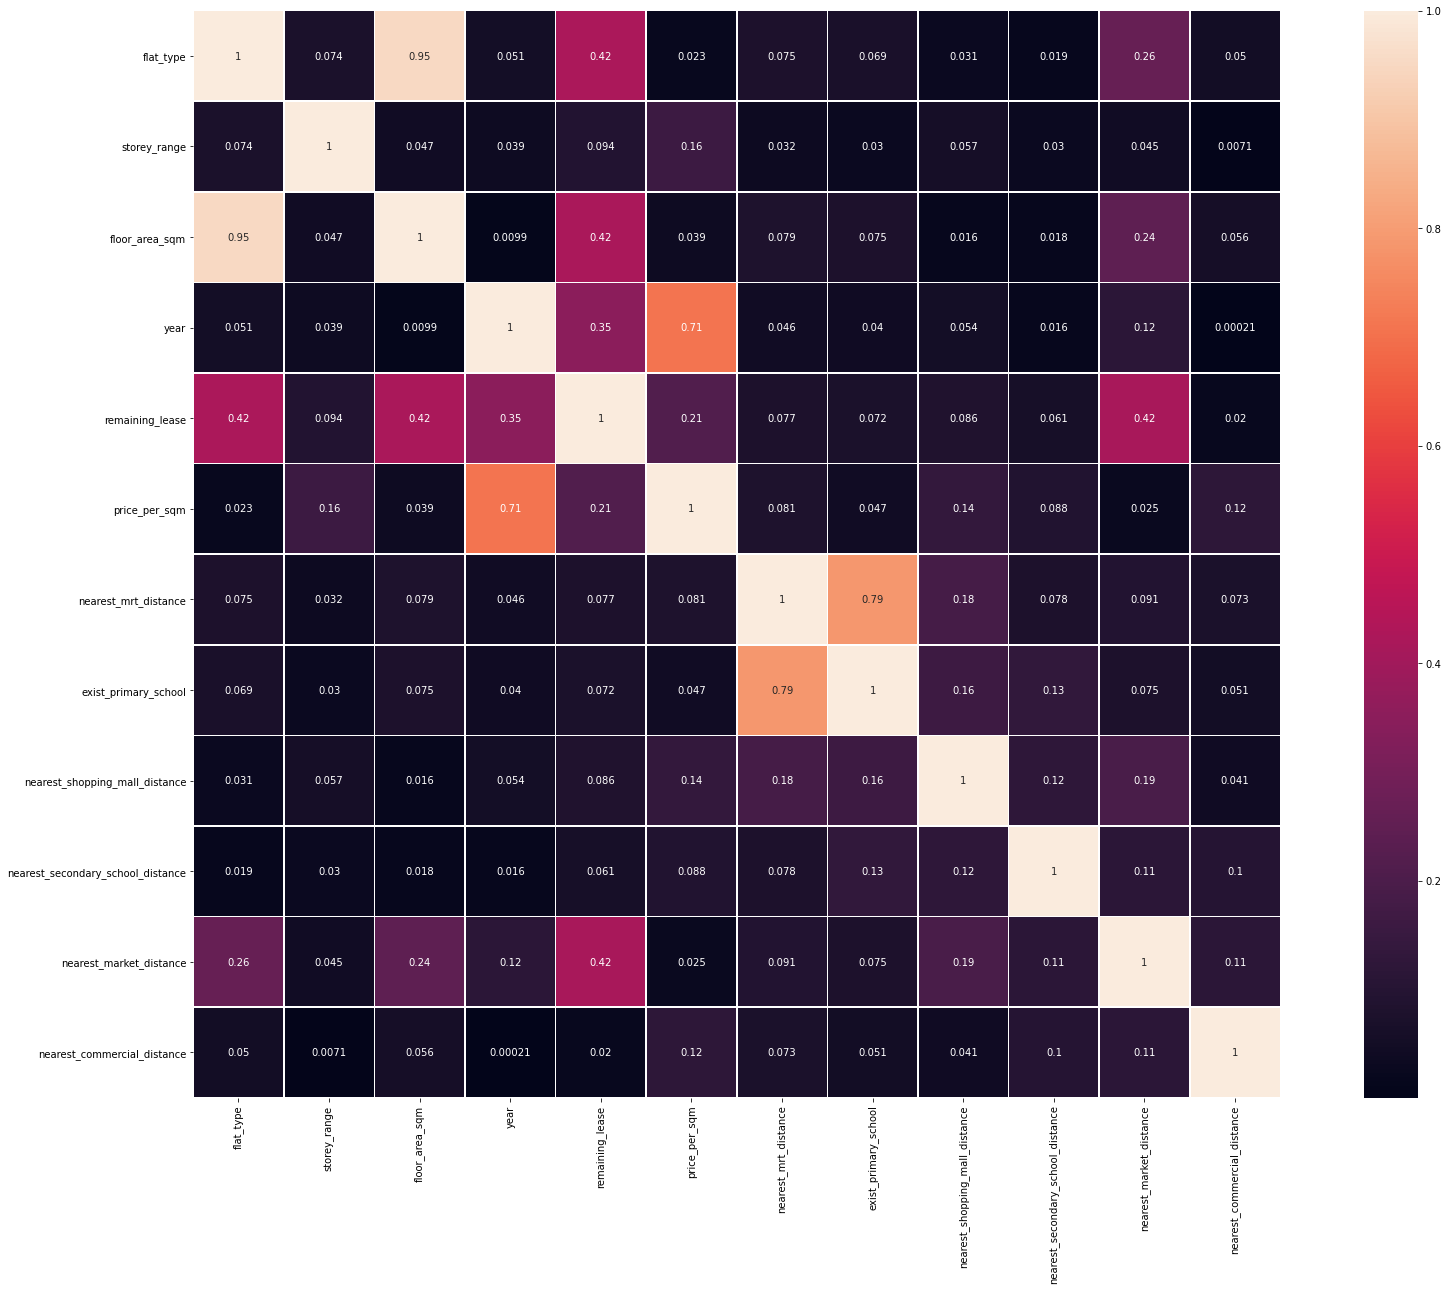

In [108]:
plt.subplots(figsize=(30, 20))
sns.heatmap(df.corr('pearson').abs(), annot = True, square = True, linewidths = 0.5)
plt.show()

In [109]:
# Determine strong pairs:
cor_pairs = df.corr().unstack()
strong_pairs = cor_pairs[((cor_pairs) > 0.5) & ((cor_pairs) < 1.0)]
strong_pairs

flat_type       floor_area_sqm    0.949934
floor_area_sqm  flat_type         0.949934
year            price_per_sqm     0.710938
price_per_sqm   year              0.710938
dtype: float64

In [110]:
# Drop one of the highly correlated variables.

df = df.drop(['floor_area_sqm'], axis=1)

In [111]:
# Variables are most correlated with dependent variable 'price_per_sqm'. 

price_cor = df.corr('pearson').abs()['price_per_sqm']

# Sort by strongest correlations. 
sorted_cor_target = price_cor.sort_values(kind = 'Quicksort', ascending=False)
sorted_cor_target

price_per_sqm                        1.000000
year                                 0.710938
remaining_lease                      0.212324
storey_range                         0.156639
nearest_shopping_mall_distance       0.136152
nearest_commercial_distance          0.119988
nearest_secondary_school_distance    0.088415
nearest_mrt_distance                 0.080713
exist_primary_school                 0.046577
nearest_market_distance              0.024664
flat_type                            0.022507
Name: price_per_sqm, dtype: float64

### check for normality

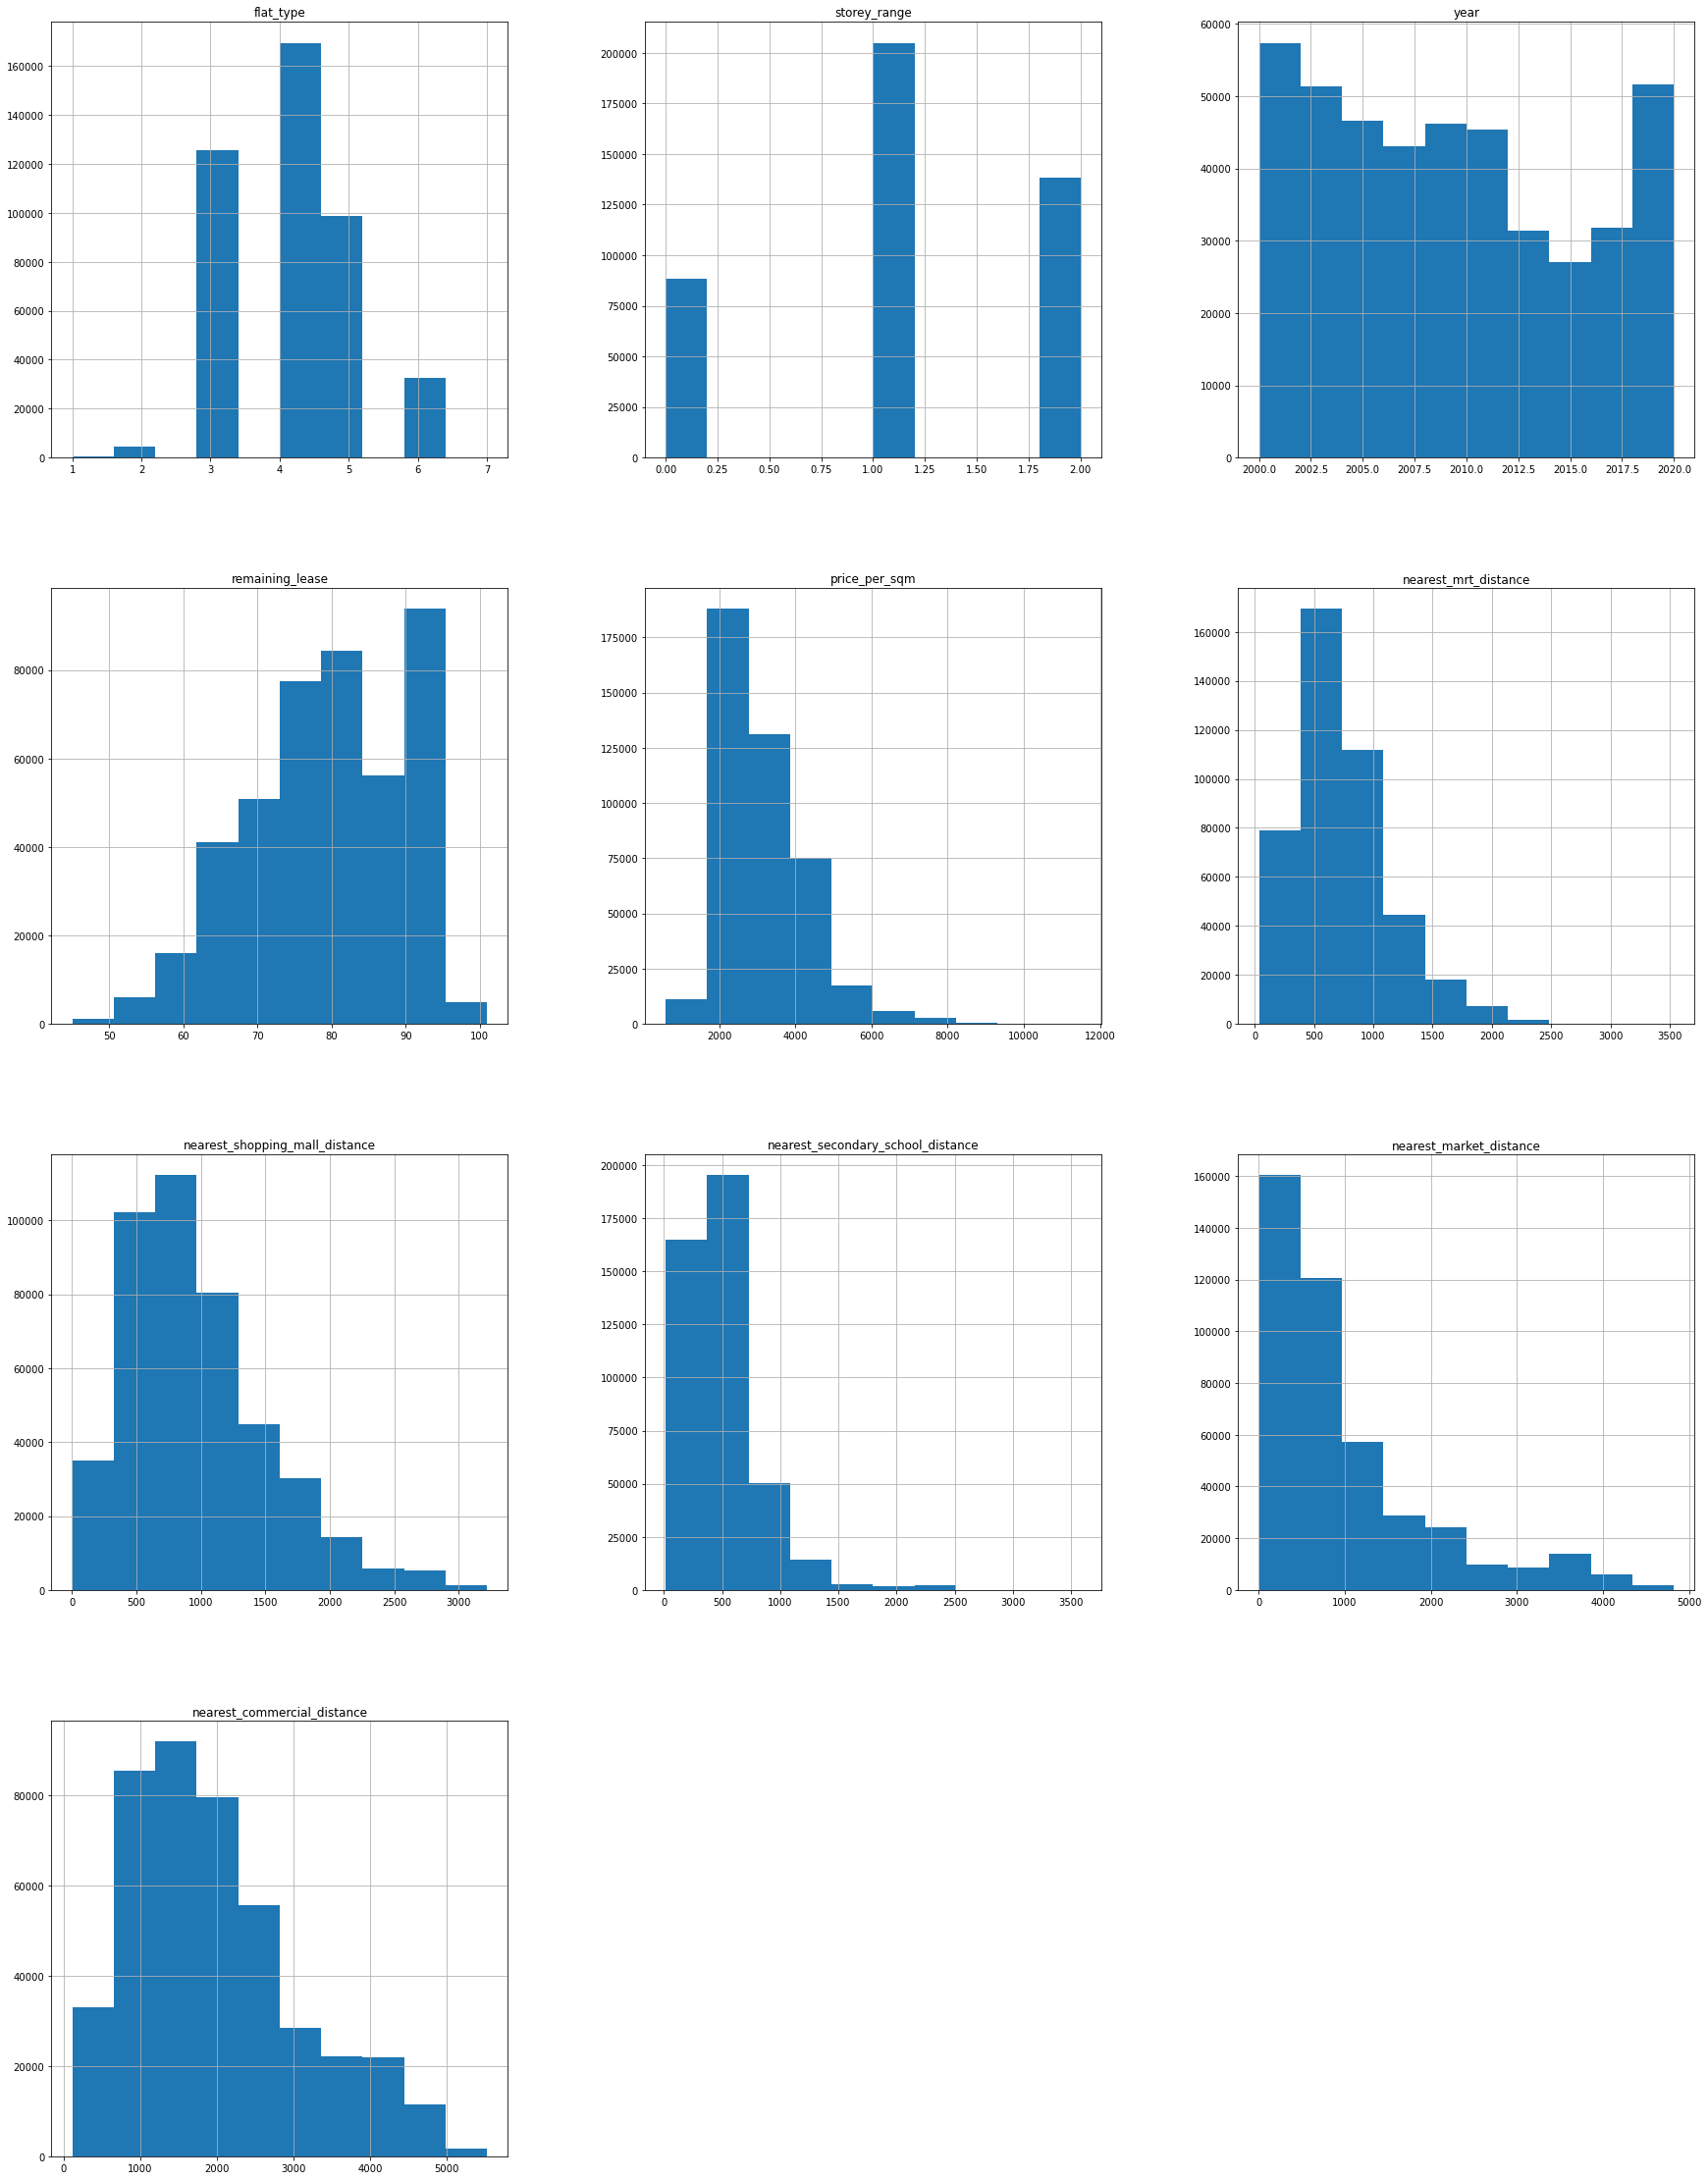

In [112]:
df_eda = df.hist(column = df.columns, figsize = (30,40))

In [113]:
# From the above plots, we conclude that logging is effective at smoothing skewness for SalePrice, LotArea, BsmtUnfSF
# & GrLivArea.

df['flat_type'] = np.log1p(df['flat_type'])
df['storey_range'] = np.log1p(df['storey_range'])
df['nearest_mrt_distance'] = np.log1p(df['nearest_mrt_distance'])
df['nearest_secondary_school_distance'] = np.log1p(df['nearest_secondary_school_distance'])
df['nearest_market_distance'] = np.log1p(df['nearest_market_distance'])
df['nearest_commercial_distance'] = np.log1p(df['nearest_commercial_distance'])

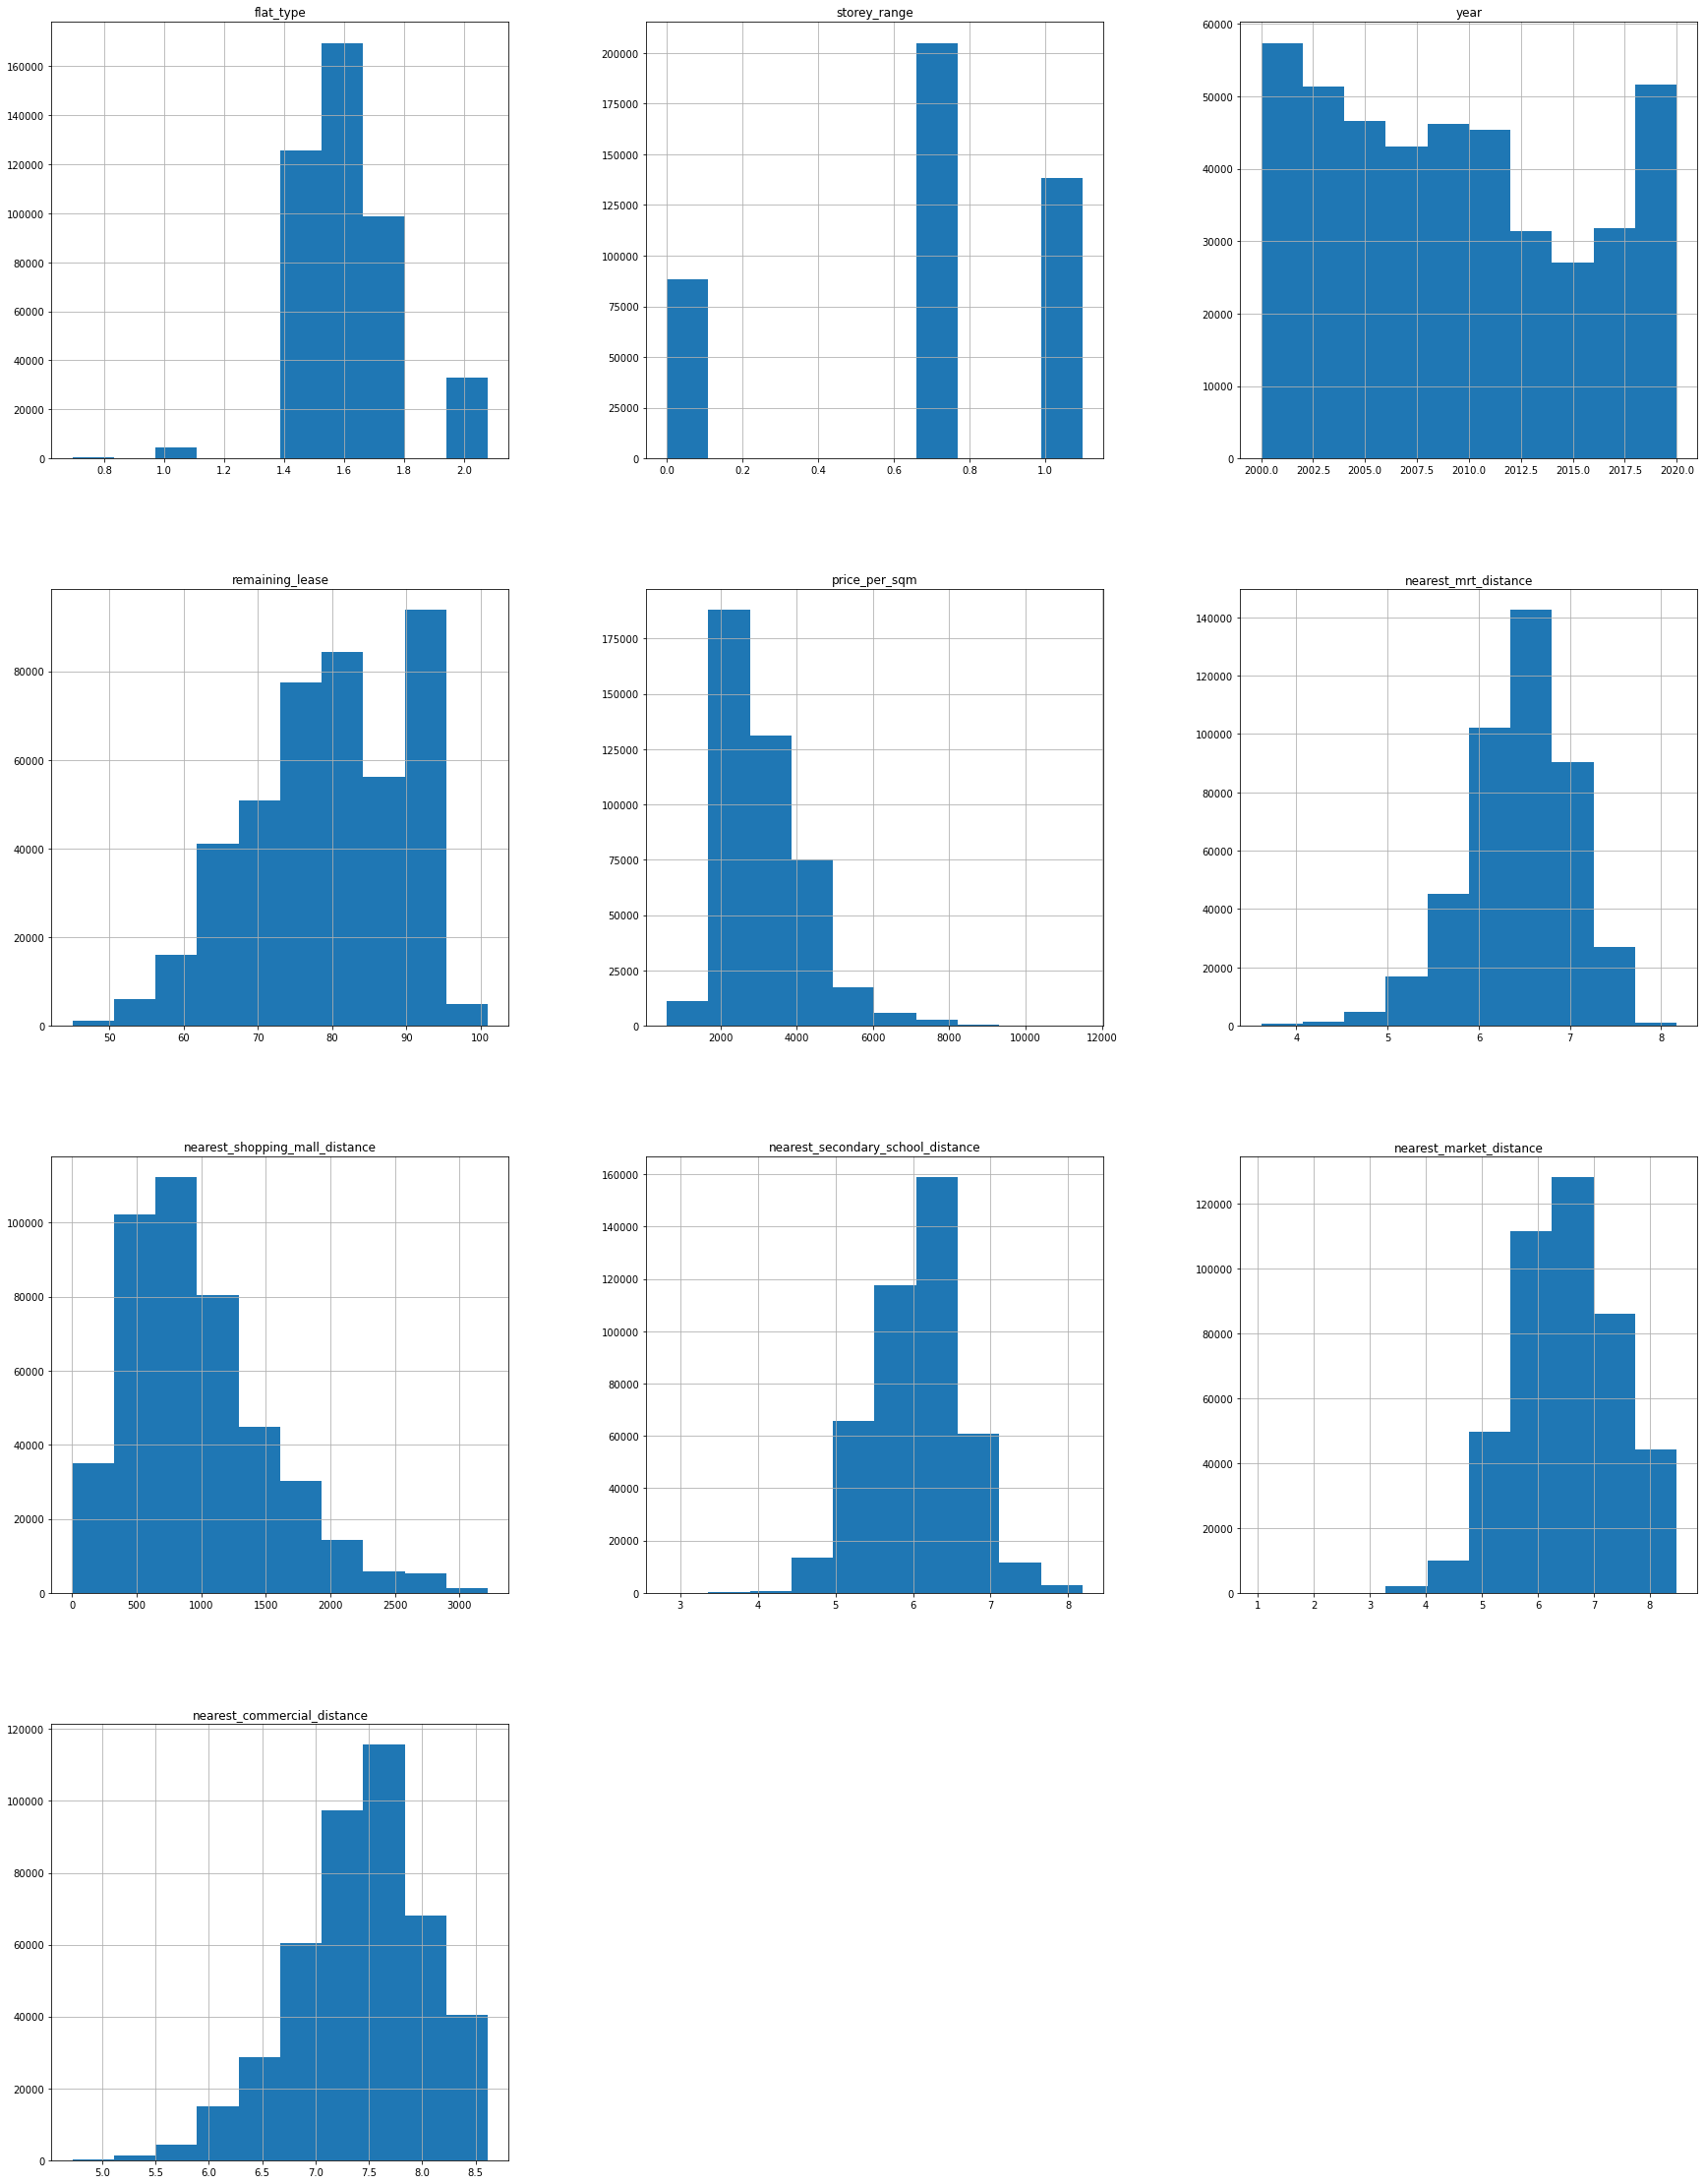

In [114]:
df_eda = df.hist(column = df.columns, figsize = (30,40))

### Encoding categorical variables

In [115]:
# exist_primary_school
df["exist_primary_school"]=df["exist_primary_school"].mask(df["exist_primary_school"]==False, 0)
df["exist_primary_school"]=df["exist_primary_school"].mask(df["exist_primary_school"]==True, 1)

In [116]:
df['exist_primary_school'] = df['exist_primary_school'].astype(str).str.strip().astype(int)

In [117]:
# one hot encoding planning_area
onehot = pd.get_dummies(df['planning_area'])
onehot.head()

,ang mo kio,bedok,bishan,bukit batok,bukit merah,bukit panjang,bukit timah,changi,choa chu kang,clementi,...,rochor,sembawang,sengkang,serangoon,sungei kadut,tampines,tanglin,toa payoh,woodlands,yishun
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df = pd.concat([df, onehot], axis=1)

In [122]:
df=df.drop(columns=['planning_area', 'flat_model', 'region', 'month'])

KeyError: "['planning_area' 'flat_model' 'region'] not found in axis"

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 43 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   flat_type                          431732 non-null  float64
 1   storey_range                       431732 non-null  float64
 2   year                               431732 non-null  int64  
 3   remaining_lease                    431732 non-null  int64  
 4   price_per_sqm                      431732 non-null  float64
 5   nearest_mrt_distance               431732 non-null  float64
 6   exist_primary_school               431732 non-null  int64  
 7   nearest_shopping_mall_distance     431732 non-null  float64
 8   nearest_secondary_school_distance  431732 non-null  float64
 9   nearest_market_distance            431732 non-null  float64
 10  nearest_commercial_distance        431732 non-null  float64
 11  ang mo kio                         4317

## Writing the process data into a new file



In [126]:
%%time
filename="processed_train2.csv"

df.to_csv(filename, index=False)
    

CPU times: user 6.45 s, sys: 159 ms, total: 6.61 s
Wall time: 6.68 s


## Split Data

In [52]:
# Convert data to numpy arrays
y = df[['price_per_sqm']].to_numpy().squeeze()
X = df.drop(columns=['price_per_sqm']).to_numpy()

In [53]:
y

array([1777.11864407, 3657.27272727, 3133.92857143, ..., 3814.92537313,
       4134.14634146, 1557.69230769])

In [54]:
X

array([[1.60943791e+00, 0.00000000e+00, 2.00100000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.79175947e+00, 1.09861229e+00, 2.01400000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.79175947e+00, 0.00000000e+00, 2.02000000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.38629436e+00, 0.00000000e+00, 2.01100000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.79175947e+00, 1.09861229e+00, 2.01300000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.60943791e+00, 0.00000000e+00, 2.00700000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [55]:
df.columns

Index(['flat_type', 'storey_range', 'year', 'remaining_lease', 'price_per_sqm',
       'nearest_mrt_distance', 'exist_primary_school',
       'nearest_shopping_mall_distance', 'nearest_secondary_school_distance',
       'nearest_market_distance', 'nearest_commercial_distance', 'ang mo kio',
       'bedok', 'bishan', 'bukit batok', 'bukit merah', 'bukit panjang',
       'bukit timah', 'changi', 'choa chu kang', 'clementi', 'downtown core',
       'geylang', 'hougang', 'jurong east', 'jurong west', 'kallang',
       'marine parade', 'novena', 'outram', 'pasir ris', 'punggol',
       'queenstown', 'rochor', 'sembawang', 'sengkang', 'serangoon',
       'sungei kadut', 'tampines', 'tanglin', 'toa payoh', 'woodlands',
       'yishun'],
      dtype='object')

In [56]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary(xname=df.columns.tolist()))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                 2.680e+04
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:51:34   Log-Likelihood:            -3.3737e+06
No. Observations:              431732   AIC:                         6.748e+06
Df Residuals:                  431690   BIC:                         6.748e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
flat_t

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [58]:
# Split dataset in to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Size of training set: {}".format(len(X_train)))
print("Size of test: {}".format(len(X_test)))

Size of training set: 345385
Size of test: 86347


In [59]:
# We fit the scaler based on the training data only
scaler = StandardScaler().fit(X_train)

# Of course, we need to convert both training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [62]:
# compute with formulas from the theory
def r_squared(y_test_pred):
    yhat = y_test_pred
    SS_Residual = sum((y_test-yhat)**2)       
    SS_Total = sum((y_test-np.mean(y_test))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test_poly.shape[1]-1)
    print(r_squared) 
    print(adjusted_r_squared) 

In [63]:
# Transform data w.r.t to degree of polynomial p
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [64]:
# Linear Regression
linear = LinearRegression(fit_intercept=False)
linear.fit(X_train_poly, y_train)

LinearRegression(fit_intercept=False)

In [65]:
y_test_pred = linear.predict(X_test_poly)
r_squared(y_test_pred)

0.8043465594199997
0.8021792508159167


In [66]:
# Ridge
ridge = Ridge(alpha=0.1, fit_intercept=False)
ridge.fit(X_train_poly, y_train)

Ridge(alpha=0.1, fit_intercept=False)

In [67]:
y_test_pred = ridge.predict(X_test_poly)
r_squared(y_test_pred)

0.8043465098434095
0.8021792006901527


In [70]:
# Lasso
lasso = Lasso(fit_intercept=False)
lasso.fit(X_train_poly, y_train)

/Users/tangyurou/opt/anaconda3/envs/cs5228project/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1390999453.7240906, tolerance: 380759244.6414632
  positive)


Lasso(fit_intercept=False)

In [71]:
y_test_pred = lasso.predict(X_test_poly)
r_squared(y_test_pred)

0.8030135192751766
0.8008314442076627


In [68]:
# Elastic Net
elastic = ElasticNet(alpha = 0.1, fit_intercept=False)
elastic.fit(X_train_poly, y_train)

ElasticNet(fit_intercept=False)

In [69]:
y_test_pred = elastic.predict(X_test_poly)
r_squared(y_test_pred)

0.7045034235498989
0.7012301242369974


In [72]:
# Baysian Ridge
b_ridge = BayesianRidge(fit_intercept=False)
b_ridge.fit(X_train_poly, y_train)

BayesianRidge(fit_intercept=False)

In [73]:
y_test_pred = b_ridge.predict(X_test_poly)
r_squared(y_test_pred)

0.8043566429014941
0.8021894459949931


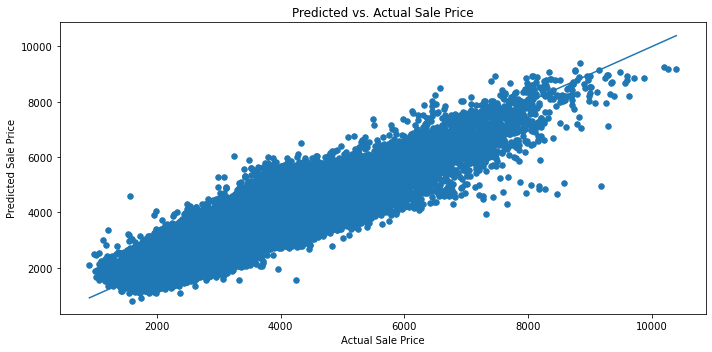

In [74]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, s=30)
plt.title('Predicted vs. Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()